In [1]:
from sklearn import preprocessing 
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import RandomForestRegressor

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据

In [4]:
# CSV 讀取資料
train = pd.read_csv("C:/Users/user/Desktop/Titanic_data/train.csv")
test = pd.read_csv("C:/Users/user/Desktop/Titanic_data/test.csv")

In [ ]:
# SQL 讀取資料 #mysql_parameter
config = {
    'db_host' : '127.0.0.1' ,'db_user' : 'root' ,'db_passwd' : '1qazxsw2' ,'db_port' : 3306 ,'db_database' : 'bi_notice' ,'charset':'utf8'
}

def sql_select(sqlcontent):
    db = pymysql.Connect(**config)
    df = pd.read_sql(sqlcontent, con=db)  
    db.close() #关闭连接
    return(df)

df_data = sql_select('selecet * from gambling_data')

# 資料解釋
PassengerId：乘客序號；
Survived：最終是否存活（1表示存活，0表示未存活）；
Pclass：艙位，1是頭等艙，3是最低等；
Name：乘客姓名；
Sex：性別；
Age：年齡；
SibSp：一同上船的兄弟姐妹或配偶；
Parch：一同上船的父母或子女；
Ticket：船票信息；
Fare：乘客票價，決定了Pclass的等級；
Cabin：客艙編號，不同的編號對應不同的位置；
Embarked：上船地點，主要是S（南安普頓）、C（瑟堡）、Q（皇后鎮）

In [13]:
data = train.append(test)
data.reset_index(inplace=True, drop=True)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  Family_size  1309 non-null   int64  
 13  Log_Fare     1309 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 143.3+ KB


In [14]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [46]:
data.isnull().sum() #查看是否具有缺失值

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Family_size       0
Log_Fare          0
dtype: int64

In [33]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Log_Fare
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0.916454
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,1.859038
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0.950608
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,1.733197
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0.956649


# 缺失值填补

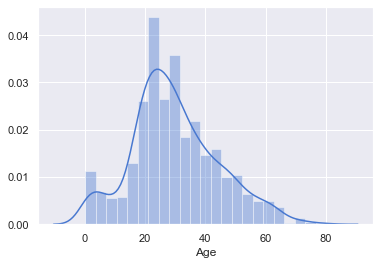

In [50]:
sns.set(style="darkgrid", palette="muted", color_codes=True) 
sns.distplot(data[data['Age'].notnull()]['Age']) #distplot函数查看乘客的年龄分布

In [52]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

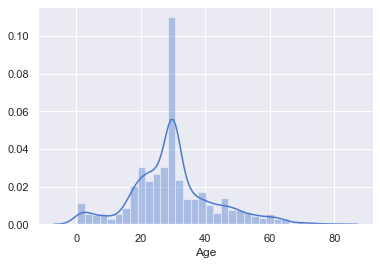

In [53]:
sns.distplot(data['Age'])

# Data Analysis

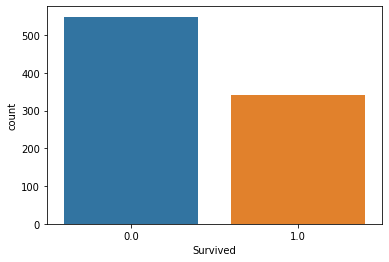

In [15]:
#存活率 0掛了 1生還
sns.countplot(data['Survived'])

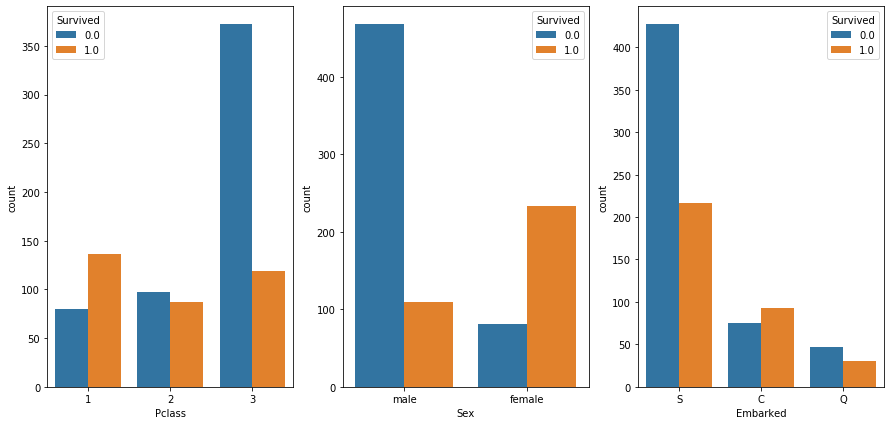

In [45]:
# 设定多图显示
fig,axes=plt.subplots(1,3, figsize=(15, 7))
#不同艙等 不同生還率
sns.countplot(data['Pclass'], hue=data['Survived'],ax=axes[0])
#男女 生還率
sns.countplot(data['Sex'], hue=data['Survived'],ax=axes[1])
# 下船地点不同德生存率
sns.countplot(data['Embarked'], hue=data['Survived'],ax=axes[2])

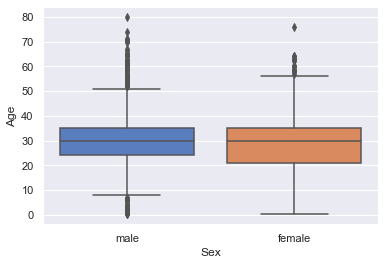

In [54]:
# 性别和年纪 
sns.boxplot(x='Sex',y='Age',data=data)

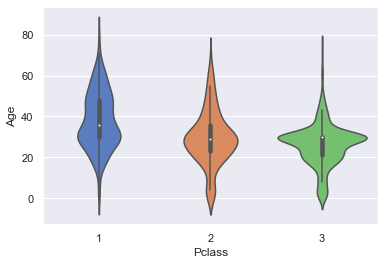

In [56]:
# 仓等 和 年纪 
sns.violinplot(x="Pclass", y="Age", data=data)

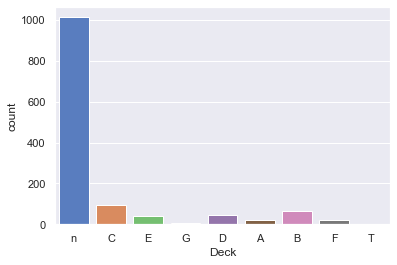

In [81]:
# 甲板 先处理字串问题
data['Deck'] = [str(deck)[0] for deck in data['Cabin']]
sns.countplot(x='Deck',data=data)

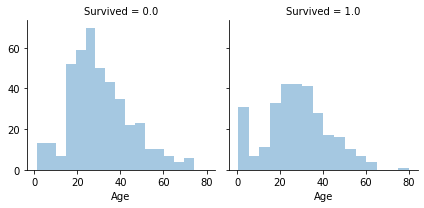

In [20]:
age = sns.FacetGrid(data, col='Survived')
age.map(sns.distplot, 'Age', kde=False)

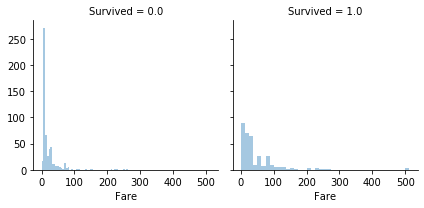

In [21]:
fare = sns.FacetGrid(data, col='Survived')
fare.map(sns.distplot, 'Fare', kde=False)

count    1308.00
mean       33.30
std        51.76
min         0.00
25%         7.90
50%        14.45
75%        31.28
max       512.33
Name: Fare, dtype: float64

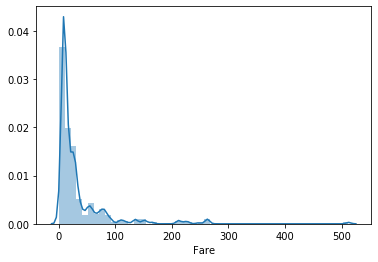

In [30]:
sns.distplot(data['Fare'])
data.describe()['Fare'].round(2)

C:\anaconda_python\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


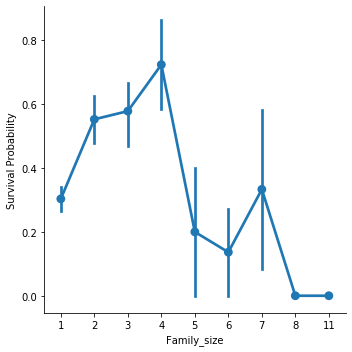

In [25]:
# Family_size
data['Family_size'] = data['SibSp'] + data['Parch'] + 1
family_size = sns.factorplot(x='Family_size', y='Survived',data=data)
family_size = family_size.set_ylabels("Survival Probability")

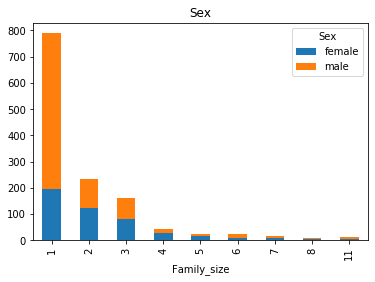

In [26]:
pd.crosstab(data['Family_size'],data['Sex']).plot(kind='bar',stacked=True,title="Sex")

Fare        
Survived    0.0     1.0
Pclass                 
1         44.75  77.958
2         13.00  21.000
3          8.05   8.517

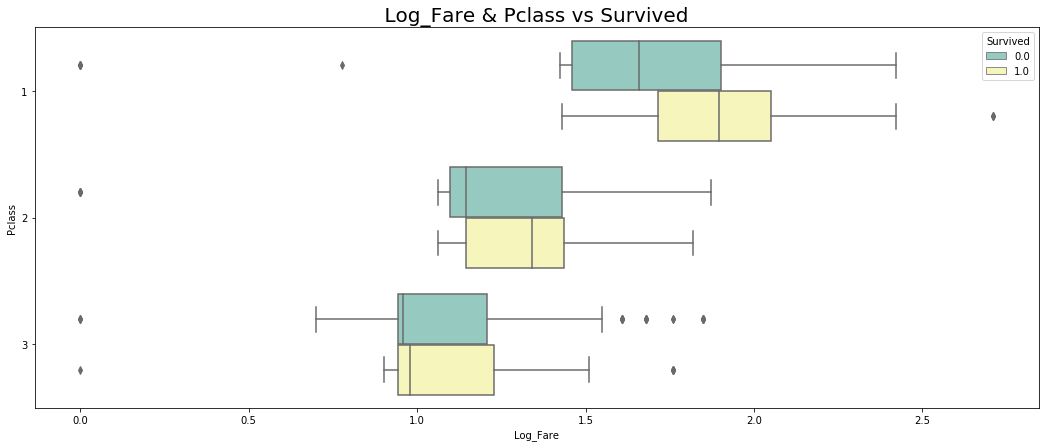

In [32]:
# there is some bugs in log-scale of boxplot. 
# alternatively, we transform x into log10(x) for visualization.
fig, ax = plt.subplots( figsize = (18,7) )
data['Log_Fare'] = (data['Fare']+1).map(lambda x : np.log10(x) if x > 0 else 0)
sns.boxplot(y='Pclass', x='Log_Fare',hue='Survived',data=data, orient='h',ax=ax,palette="Set3")
ax.set_title(' Log_Fare & Pclass vs Survived ',fontsize = 20)
pd.pivot_table(data,values = ['Fare'], index = ['Pclass'], columns= ['Survived'] ,aggfunc = 'median' ).round(3)

# Feature Engineering

In [ ]:
# 轉換艙等  轉為取字母
data["Cabin"] = data['Cabin'].apply(lambda x : str(x)[0] if not pd.isnull(x) else 'NoCabin')

In [ ]:
# 轉換為特徵工程數值
data['Sex'] = data['Sex'].astype('category').cat.codes
data['Embarked'] = data['Embarked'].astype('category').cat.codes
data['Pclass'] = data['Pclass'].astype('category').cat.codes
data['Title1'] = data['Title1'].astype('category').cat.codes
data['Title2'] = data['Title2'].astype('category').cat.codes
data['Cabin'] = data['Cabin'].astype('category').cat.codes
data['Ticket_info'] = data['Ticket_info'].astype('category').cat.codes